# Replicación del paper _Simultaneous Optimization of Deacetylation Degree and Molar Mass of Chitosan from Shrimp Waste_

### Abstract original:
Shrimp waste is a valuable source for chitin extraction and consequently for chitosan
preparation. In the process of obtaining chitosan, a determining step is the chitin deacetylation. The
main characteristic of chitosan is the degree of deacetylation, which must be as high as possible. The
molar mass is another important parameter that defines its utilizations, and according to these, high
or low molar masses are required. The present study is an attempt to optimize the deacetylation step
to obtain chitosan with a high degree of deacetylation and high or low molar mass. The study was
carried out based on experimental data obtained in the frame of a central composite design where
three working parameters were considered: NaOH concentration, liquid:solid ratio, and process
duration. The regression models defined for the degree of deacetylation (DD) and for the mean
molar mass (MM) of chitosan powders were used in the formulation of optimization problems. The
objectives considered were simultaneous maximum DD and maximum/minimum MM for the final
chitosan samples. For these purposes, multiobjective optimization problems were formulated and
solved using genetic algorithms implemented in Matlab®. The multiple optimal solutions represented
by trade-offs between the two objectives are presented for each case

Supuestos tomados en este trabajo de replicación:

* El parámetro de generaciones de algoritmo NSGA-II, llamado n_gen, se tomó por 200.
* Se tomaron como reales los valores experimentales (no se comprobaron en laboratorio)
* Se tomó como p-value, para las pruebas ANOVA, de entre 0.35-0.45 (se explica después el por qué)
* Se suposo que los valores mostrados en las tablas 5 y 6 del artículo eran suficientes para obtener conclusiones sobre la proximidad al frente de Pareto del artículo. 

# ANOVA


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# 1. Datos experimentales
data = pd.DataFrame({
    "x1": [-1, -1, -1, -1,  1,  1,  1,  1, -1.68, 1.68, 0, 0, 0, 0, 0, 0, 0],
    "x2": [-1, -1,  1,  1, -1, -1,  1,  1, 0, 0, -1.68, 1.68, 0, 0, 0, 0, 0],
    "x3": [-1,  1, -1,  1, -1,  1, -1,  1, 0, 0, 0, 0, -1.68, 1.68, 0, 0, 0],
    "DD": [62.0, 75.5, 52.0, 62.5, 100, 88.5, 82.95, 91.5, 27.5, 92.0, 88.5, 93.77, 63.33, 96.95, 96.27, 86.65, 88.25],
    "MM": [69.83, 26.39, 66.43, 67.04, 363.62, 663.81, 541.53, 825.00, 34.10, 612.14, 475.43, 413.22, 155.52, 170.50, 819.99, 804.33, 669.64]
})

In [3]:
#crea términos del modelo cuadrático
data["x1x2"] = data["x1"]*data["x2"]
data["x1x3"] = data["x1"]*data["x3"]
data["x2x3"] = data["x2"]*data["x3"]
data["x1_2"] = data["x1"]**2
data["x2_2"] = data["x2"]**2
data["x3_2"] = data["x3"]**2

# ajusta regresiones lineales múltiples
X = data[["x1", "x2", "x3", "x1x2", "x1x3", "x2x3", "x1_2", "x2_2", "x3_2"]]
X = sm.add_constant(X)
DD_model = sm.OLS(data["DD"], X).fit()
MM_model = sm.OLS(data["MM"], X).fit()

print(DD_model.summary())
print(MM_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     DD   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     8.372
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00526
Time:                        13:14:24   Log-Likelihood:                -53.234
No. Observations:                  17   AIC:                             126.5
Df Residuals:                       7   BIC:                             134.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3432      4.976     18.154      0.0

In [4]:
print(f"R² DD modelo completo: {DD_model.rsquared:.3f}")
print(f"R² MM modelo completo: {MM_model.rsquared:.3f}")
print(f"p-valor F-test DD: {DD_model.f_pvalue:.3f}")
print(f"p-valor F-test MM: {MM_model.f_pvalue:.3f}")

# 2. Selección de términos significativos
significant_DD = DD_model.pvalues[DD_model.pvalues < 0.05].index
significant_MM = MM_model.pvalues[MM_model.pvalues < 0.05].index

R² DD modelo completo: 0.915
R² MM modelo completo: 0.945
p-valor F-test DD: 0.005
p-valor F-test MM: 0.001


# Response Surface Methodology

In [5]:
#Rango de los factores codificados
x1_vals = np.linspace(-1.68, 1.68, 50)
x2_vals = np.linspace(-1.68, 1.68, 50)
x3_vals = np.linspace(-1.68, 1.68, 50)

# Por ejemplo, fijamos x2 = 0 para graficar DD vs x1-x3
X1, X3 = np.meshgrid(x1_vals, x3_vals)
X2 = 0  # fijamos x2

In [6]:
#Modelo reducido DD
def DD_model(x1, x2, x3):
    return (90.897 
            + 16.072*x1 
            - 2.066*x2 
            + 5.682*x3 
            - 3.369*x1*x3 
            - 10.823*x1**2 
            - 3.599*x3**2)

#Modelo reducido MM
def MM_model(x1, x2, x3):
    return (761.559 
            + 229.786*x1 
            + 41.480*x3 
            + 78.312*x1*x3 
            - 146.086*x1**2 
            - 103.142*x2**2 
            - 202.813*x3**2)

DD_surface = DD_model(X1, X2, X3)
MM_surface = MM_model(X1, X2, X3)

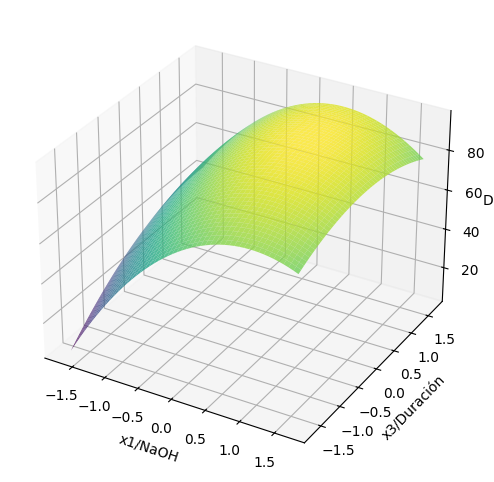

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X3, DD_surface, cmap="viridis", alpha=0.8)
ax.set_xlabel("x1/NaOH")
ax.set_ylabel("x3/Duración")
ax.set_zlabel("DD/%")
#ax.set_title("Surface Response DD (x2=0)")
plt.show()

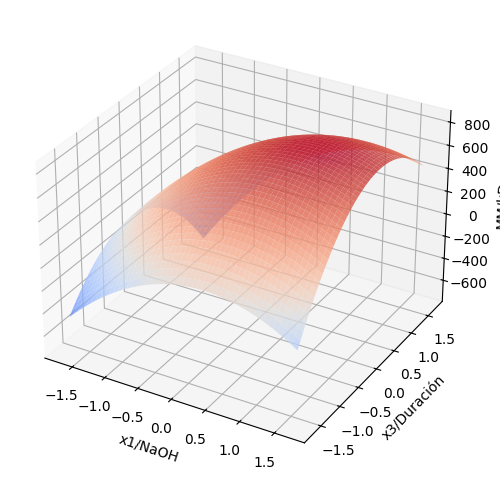

In [149]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X3, MM_surface, cmap="coolwarm", alpha=0.8)
ax.set_xlabel("x1/NaOH")
ax.set_ylabel("x3/Duración")
ax.set_zlabel("MM/kDa")
#ax.set_title("Surface Response MM (x2=0)")
plt.show()

# Aplicación de algoritmo NSGA-II 

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.problem import Problem

Aplicamos el algoritmo para # DD↑ (en Python es −DD↓), MM↓

In [9]:
class ChitosanProblem(Problem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=2, xl=-1.68, xu=1.68) # Originales xl=-1.68, xu=1.68

    def _evaluate(self, X, out, *args, **kwargs):
        x1, x2, x3 = X[:,0], X[:,1], X[:,2]
        
        # Ecuaciones obtenidas del ANOVA y confirmadas en el paper
        dd = 90.897 + 16.072*x1 - 2.066*x2 + 5.682*x3 - 3.369*x1*x3 - 10.823*(x1**2) - 3.599*(x3**2)
        mm = 761.559 + 229.786*x1 + 41.480*x3 + 78.312*x1*x3 - 146.086*(x1**2) - 103.142*(x2**2) - 202.813*(x3**2)
        
        out["F"] = np.column_stack([-dd, mm])  # DD (−DD↓), MM↓

problem_mix = ChitosanProblem()
algorithm = NSGA2(pop_size=100)
res_1 = minimize(problem_mix, algorithm, ("n_gen", 200), seed = 14, verbose=False)

dd_vals_1 = -res_1.F[:,0]   # revertimos el signo para mostrar DD positivo
mm_vals_1 = res_1.F[:,1]   

#Realizamos un print
print("DD range:", dd_vals_1.min(), "–", dd_vals_1.max())
print("MM range:", mm_vals_1.min(), "–", mm_vals_1.max())

DD range: 45.71669284851711 – 101.09242795597561
MM range: -1051.663384030694 – 557.2763132638626


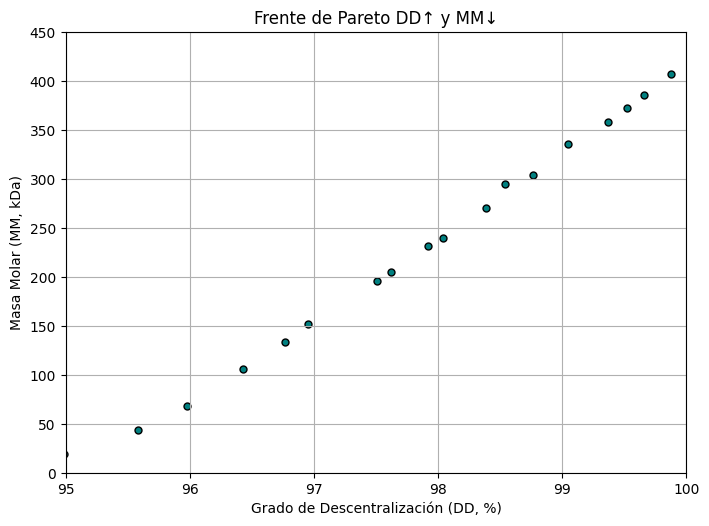

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(dd_vals_1, mm_vals_1, c="teal", s=25, edgecolors="k")
plt.xlim([95, 100])
plt.ylim([0, 450]) # Ajustamos los rangos porque MM tiene un 
                   # rango mucho menor que el original
plt.tight_layout()
#plt.title("Frente de Pareto DD↑ y MM↓")
plt.xlabel("Grado de Descentralización (DD, %)")
plt.ylabel("Masa Molar (MM, kDa)")
plt.grid(True)
plt.show()

En la frontera de Pareto se modificaron los rangos de la gráfica (porque tenían valores fuera de lo posible físicamente).

Aplicamos el algoritmo para DD↑ y MM↑

In [12]:
class ChitosanProblem(Problem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=2, xl=-1.68, xu=1.68)

    def _evaluate(self, X, out, *args, **kwargs):
        x1, x2, x3 = X[:,0], X[:,1], X[:,2]
        
        # Ecuaciones obtenidas del ANOVA y confirmadas en el paper
        dd = 90.897 + 16.072*x1 - 2.066*x2 + 5.682*x3 - 3.369*x1*x3 - 10.823*(x1**2) - 3.599*(x3**2)
        mm = 761.559 + 229.786*x1 + 41.480*x3 + 78.312*x1*x3 - 146.086*(x1**2) - 103.142*(x2**2) - 202.813*(x3**2)
        out["F"] = np.column_stack([-dd, -mm])  # DD MM

problem_both = ChitosanProblem()
algorithm = NSGA2(pop_size=100)
res_2 = minimize(problem_both, algorithm, ("n_gen", 200), seed=14, verbose=False)


dd_vals_2 = -res_2.F[:,0]   # revertimos el signo para mostrar DD positivo
mm_vals_2 = -res_2.F[:,1]    # MM ya está en su forma real (a minimizar)

print("DD range:", dd_vals_2.min(), "–", dd_vals_2.max())
print("MM range:", mm_vals_2.min(), "–", mm_vals_2.max())


DD range: 97.21125870769168 – 101.09235799461419
MM range: 557.6531122588498 – 865.7289440263612


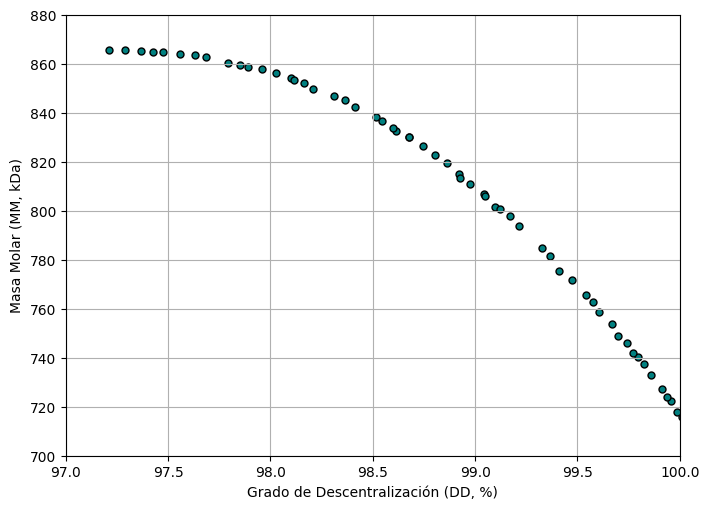

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(dd_vals_2, mm_vals_2, c="teal", s=25, edgecolors="k")
plt.xlim([97, 100]) # Ligero a juste para que se vea como en el paper
plt.ylim([700, 880])
plt.tight_layout()
#plt.title("Frontera de Pareto para DD↑ y MM↑")
plt.xlabel("Grado de Descentralización (DD, %)")
plt.ylabel("Masa Molar (MM, kDa)")
plt.grid(True)
plt.show()

# Modificación del algoritmo 
Se aumentó de tamaño de población a 300 y con parámetros de crossover y mutación para exploración

In [14]:
from pymoo.operators.mutation.pm import PM
from pymoo.operators.crossover.sbx import SBX
# Se importan estas funciones para ajustar correctamente los parámetros

Aplicamos el algoritmo para DD↑ MM↓

In [15]:
algorithm = NSGA2(
	pop_size=200,
	crossover_prob= SBX(eta = 30, prob = 0.9),
	mutation=PM(eta=60)
)
res_1cm = minimize(problem_mix, algorithm, ("n_gen", 200), seed = 14, verbose=False)

dd_vals_1cm = -res_1cm.F[:,0]  # agregamos cm para idenificar los que aplican crossover y mutation
mm_vals_1cm = res_1cm.F[:,1]   

#Realizamos un print
print("DD range:", dd_vals_1cm.min(), "–", dd_vals_1cm.max())
print("MM range:", mm_vals_1cm.min(), "–", mm_vals_1cm.max())

DD range: 45.7166928027698 – 101.0924378250343
MM range: -1051.6633862310055 – 557.3632770151423


Aplicamos el algoritmo para DD↑ y MM↑

In [ ]:
algorithm = NSGA2(
	pop_size=200,
	crossover_prob= SBX(eta = 30, prob = 0.9),
	mutation=PM(eta=60)
)

res_2cm = minimize(problem_both, algorithm, ("n_gen", 200), seed=14, verbose=False)

dd_vals_2cm = -res_2cm.F[:,0]   # revertimos el signo para mostrar DD positivo
mm_vals_2cm = -res_2cm.F[:,1]    # MM ya está en su forma real (a minimizar)

print("DD range:", dd_vals_2cm.min(), "–", dd_vals_2cm.max())
print("MM range:", mm_vals_2cm.min(), "–", mm_vals_2cm.max())

DD range: 97.21689481443319 – 101.09235106338781
MM range: 557.4070432013611 – 865.7282203973929


# Comparación con IGD e HV

Se utilizan las tablas 5 y 6 del paper para obtener datos. No es todo el frente, pero sirve como una referencia para comparar los dos algoritmos y determinar si bajar la exploración y aumentar la explotación, referente a los valores default del NSGA-II, pueden mejorar el acercamiento. 

Para esto se propusieron los valores de:

* pop_size=200,
* crossover_prob= SBX(eta = 30, prob = 0.9),
* mutation=PM(eta=60)

Con esto se quiere priorizar la explotación

In [17]:
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV

### Para maximizar DD y minizar MM


In [18]:
ref_data = pd.DataFrame({
    "DD": [96.57, 97.79, 96.00, 97.52, 94.9],
    "MM": [122.4, 225.3, 75.60, 199.7, 72.5]
})
F_ref_1 = ref_data.to_numpy()

#### Parámetros Default

In [19]:
# Frente obtenido por tu NSGA-II
F = res_1.F

F_real = np.column_stack([dd_vals_1, mm_vals_1])

print("Parámetros de default")
# ---IGD ---
metric_igd = IGD(F_ref_1)
igd_value = metric_igd(F_real)
print(f"IGD respecto al paper: {igd_value:.4f}")

ref_point = np.array([94, 25])  #rango aproximado del paper
metric_hv = HV(ref_point=ref_point)
hv_value = metric_hv(F)
print(f"Hypervolume: {hv_value:.4f}")

Parámetros de default
IGD respecto al paper: 6.6325
Hypervolume: 179327.8979


#### Parámetros de modificados

In [20]:
F = res_1cm.F

F_real = np.column_stack([dd_vals_1cm, mm_vals_1cm])

print("Parámetros de modificados")
# ---IGD ---
metric_igd = IGD(F_ref_1)
igd_value = metric_igd(F_real)
print(f"IGD respecto al paper: {igd_value:.4f}")

ref_point = np.array([94, 25])  #rango aproximado del paper
metric_hv = HV(ref_point=ref_point)
hv_value = metric_hv(F)
print(f"Hypervolume: {hv_value:.4f}")

Parámetros de modificados
IGD respecto al paper: 1.5766
Hypervolume: 179581.6402


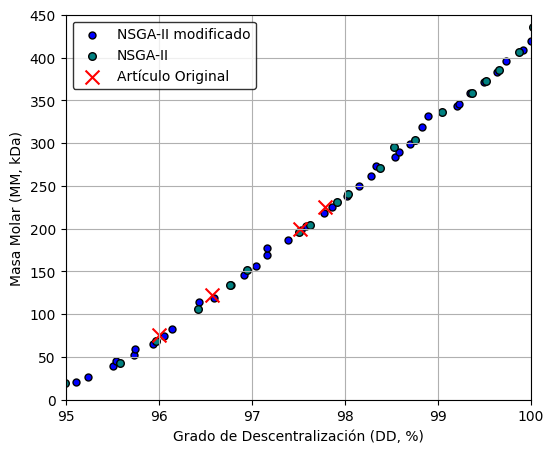

In [21]:
plt.figure(figsize=(6,5))
plt.scatter(dd_vals_1cm, mm_vals_1cm, c="blue", label="NSGA-II modificado", s=25, edgecolors="k")
plt.scatter(dd_vals_1, mm_vals_1, c="teal", label="NSGA-II" , s=30, edgecolors="k")
plt.scatter(F_ref_1[:,0], F_ref_1[:,1], label="Artículo Original", color="red", marker="x", s=100)
#plt.title("Comparación del frente de Pareto (DD↑, MM↓)")
plt.xlabel("Grado de Descentralización (DD, %)")
plt.ylabel("Masa Molar (MM, kDa)")
plt.xlim([95, 100])
plt.ylim([0, 450]) # Ajustamos los rangos porque MM tiene un 
                   # rango mucho menor que el original
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True)
plt.show()

Para Maximizar ambos: DD y MM

In [22]:
ref_data = pd.DataFrame({
    "DD": [97.60, 97.18, 98.10, 97.83],
    "MM": [863.66, 865.66, 853.78, 860.45]
})
F_ref_2 = ref_data.to_numpy()

#### Parámetros default

In [153]:

# Frente obtenido por tu NSGA-II
F = res_2.F

F_real = np.column_stack([dd_vals_2, mm_vals_2])
print("Parámetros default")
# ---IGD ---
metric_igd = IGD(F_ref_2)
igd_value = metric_igd(F_real)
print(f"IGD respecto al paper: {igd_value:.4f}")

ref_point = np.array([97, 700])  #rango aproximado del paper
metric_hv = HV(ref_point=ref_point)
hv_value = metric_hv(F)
print(f"Hypervolume: {hv_value:.4f}")

Parámetros default
IGD respecto al paper: 0.1535
Hypervolume: 309776.9876


#### Parámetros modificados

In [154]:

# Frente obtenido por tu NSGA-II
F = res_2cm.F

F_real = np.column_stack([dd_vals_2cm, mm_vals_2cm])

print("Parámetros de modificados")
# ---IGD ---
metric_igd = IGD(F_ref_2)
igd_value = metric_igd(F_real)
print(f"IGD respecto al paper: {igd_value:.4f}")

ref_point = np.array([97, 700])  #rango aproximado del paper
metric_hv = HV(ref_point=ref_point)
hv_value = metric_hv(F)
print(f"Hypervolume: {hv_value:.4f}")

Parámetros de modificados
IGD respecto al paper: 0.1519
Hypervolume: 309784.5023


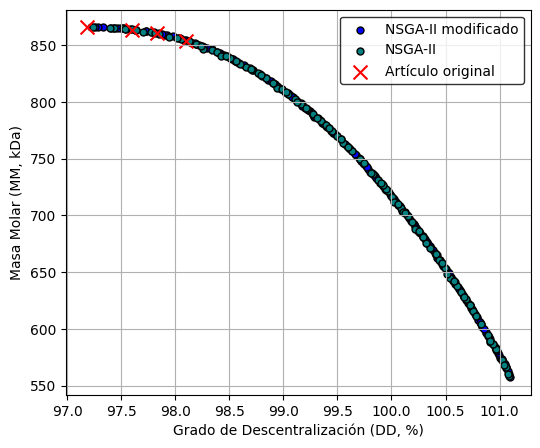

In [156]:
plt.figure(figsize=(6,5))
plt.scatter(dd_vals_2cm, mm_vals_2cm, c="blue", label="NSGA-II modificado", s=25, edgecolors="k")
plt.scatter(dd_vals_2, mm_vals_2, c="teal", label="NSGA-II" , s=25, edgecolors="k")
plt.scatter(F_ref_2[:,0], F_ref_2[:,1], label="Artículo original", color="red", marker="x", s=100)
#plt.title("Comparación del frente de Pareto (DD↑, MM↑)")
plt.xlabel("Grado de Descentralización (DD, %)")
plt.ylabel("Masa Molar (MM, kDa)")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True)
plt.show()